## How to evaluate and compare colormaps

Matteo Niccoli, MyCarta

Calgary, Alberta, Canada

mycarta.wordpress.com

matteo@mycarta.ca

### Note on Python version

#### As of September 30th, 2018, this notebook will run on Python 3.6.

### Introduction

Spectral, rainbow, and rainbow-like palettes are not perceptual: they do not match how the brain intuitively interprets color. 
There is a wealth of literature (e.g. Borland et al. 2007, Rogowitz and Kalvin 2001, Montag 1999, Rogowitz et al. 1999, Light and Bartlein 2004, Borkin et al. 2011) showing that these non-perceptual palettes are poor choices for maps and data visualization. 

To represent interval data (e.g. elevation or time structure) or ratio data (e.g. seismic amplitude), the equal steps in the magnitude of the data require equal perceptual distance between points in the color scale. 
So good palettes are those that have a monotonic and increasing lightness (or alternatively intensity) profile.

### Perception experiment

You can convince yourself of how bad these palettes are with the experiment in this section, where we deconstruct 'spectral', one of the default palettes from the Matplotlib plotting library commonly used in scientific computing.

The conceptual premise for the experiment comes from Rogowitz et al. (1999), who examined the hue–saturation–lightness components of several colormaps to see how each component encoded the magnitude information in the data. Previously I've done a similar experiment with the ROYGBIV colours in the 3rd post (http://wp.me/p1IlJY-yD) of my blog series 'The rainbow is dead... long live the rainbow'. Let's try it here with 'spectral'.

First, we import the Numpy Python library (a set of functions to run mathematical operations. Typically these tools are faster than the default Python commands).
Next, we import the plot command from the Matplotlib library (a library of plotting functions and utilities commonly used in scientific computing).
Finally we import a couple of tools we will be using to manipulate colours.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as clr
import matplotlib.cm as cm

Let's first have a look at the Matplotlib spectral colormap.
To do that, the next block of code generates a random 8x8 checker-board pattern then uses spectral to colour it. We also add a colorbar.

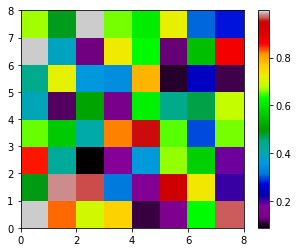

In [2]:
rndm = np.random.rand(8,8)
my_spectral = plt.get_cmap('nipy_spectral') 

plt.figure(figsize=(5,4))
plt.pcolor(rndm, cmap=my_spectral)
plt.colorbar()
plt.show()

The sequence of colours in the colorbar it looks very familiar: many colormaps in a wide range of software are just like this one. They are derived from the visible part of the electromagnetic spectrum by converting individual wavelengths into RGB colours. 
http://science-edu.larc.nasa.gov/EDDOCS/Wavelengths_for_Colors.html

If you're interested in the process, one way to do it is to use one of the colour matching functons in here http://cvrl.ioo.ucl.ac.uk/cmfs.htm (for example the the CIE 1931 modified by Judd and Vos). You will get XYZ triplets representing colors sampled at a constant interval of 5 nanometer in the wavelength range 360-830 nm. XYZ values can be converted to RGB using standard formulas (e.g. http://www.brucelindbloom.com/index.html?Eqn_RGB_XYZ_Matrix.html). In Matlab you can do it with the Spectral and XYZ functions collection: http://www.mathworks.com/matlabcentral/fileexchange/7021-spectral-and-xyz-color-functions.

The spectral colormap I use in this notebook was first developed by the neuroimaging project (NiPy) folks and subsequently added to Matplotlib (https://github.com/matplotlib/matplotlib/issues/879/)

You can see the full set of RGB values here:

https://github.com/matplotlib/matplotlib/commit/b64652d335d4318d1b1a332843837a0c17a4a202

The next block of code creates a 16-hue colorbar using this spectral colormap. The first step is to generate a sequence of evenly spaced numbers, the integers from 0 to 15, using the numpy.arange function. Each of these numbers will be assigned a colour when we plot the sequence using the colormap (note that throughout the notebook I will use hues and colours interchangeably, and also sometimes I will use palette in place of colormap).

N.B. the function imshow used to plot the colorbar does not take a 1D array as input (it is intended for images) so by passing data as such you'd get an error message but passing it as [data] circumvents the limitation.

You can uncomment the last line to save the figure as a PNG image file.

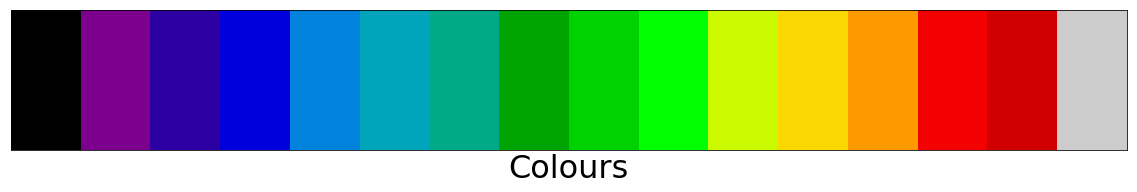

In [3]:
data=np.arange(16)

fig1 = plt.figure(figsize=(20, 4))
ax1 = fig1.add_subplot(1, 1, 1)

ax1.set_xticks([])
ax1.set_yticks([])  # these two commands remove tick marks (and tick labels) by setting them as empty

ax1.set_xlabel('Colours', fontsize = '32')
im = ax1.imshow([data], interpolation = 'none', cmap = 'nipy_spectral', aspect='2')
plt.show()

#fig1.savefig('colours.png', dpi=100)

At first sight this colorbar may seem like a pleasant and ordered sequence of hues. But to check if it is also perceptually ordered we really need to look at how these hues encode the magnitude in the data, and we do that by converting the hues to intensity and analysing the sequence of intensity values.

The first step is to extract the RGB values for each colour. This is not trivial because we're using a Matplotlib colormap, which has values for R, G, B, and A (Alpha, which controls opacity) in the range 0-1, whereas the data is made up of 16 numbers is in the range 0-15. 

The first block of code below scales the data to the same range as the colormap so we can extract the RGB values. In other words, we create 16 equally spaced numbers between 0 and 1.

In [4]:
# generate 16 equally-spaced numbers in the range 0-1 
norm = clr.Normalize(0, 15) 
n=norm(data) 

In [5]:
# make sure we got what we wanted
for i in zip(data,n):
    print (i)

(0, 0.0)
(1, 0.06666666666666667)
(2, 0.13333333333333333)
(3, 0.2)
(4, 0.26666666666666666)
(5, 0.3333333333333333)
(6, 0.4)
(7, 0.4666666666666667)
(8, 0.5333333333333333)
(9, 0.6)
(10, 0.6666666666666666)
(11, 0.7333333333333333)
(12, 0.8)
(13, 0.8666666666666667)
(14, 0.9333333333333333)
(15, 1.0)


With the next block of code below we use the 16 numbers in 'n' to extract the RGBA values for each color in the palette, then we discard A.

The way we discard A is with the slicing notation [:,:3]. This is equivalent to saying: "for every row (specified by the colon operator ':') in the variable rgba, get items from 0 to, but not including 3 (specified by :3). Notice that Python indexes elements starting with 0, not with 1, like Matlab for example.
More help on slicing in this Stackoverflow answer http://stackoverflow.com/a/509295/1034648. 

In [6]:
# get the colormap
my_cmap = cm.get_cmap('nipy_spectral') 

# extract the colormap RGBA values at the 16 points
rgba = my_cmap(n)

# slice rgba to discard Alpha
rgb01= rgba[:,:3]

print (rgb01)

[[0.         0.         0.        ]
 [0.4889     0.         0.55553333]
 [0.17776667 0.         0.64446667]
 [0.         0.         0.8667    ]
 [0.         0.51113333 0.8667    ]
 [0.         0.64446667 0.73336667]
 [0.         0.6667     0.5333    ]
 [0.         0.64443333 0.        ]
 [0.         0.82223333 0.        ]
 [0.         1.         0.        ]
 [0.79996667 0.97776667 0.        ]
 [0.97776667 0.84443333 0.        ]
 [1.         0.6        0.        ]
 [0.95556667 0.         0.        ]
 [0.82223333 0.         0.        ]
 [0.8        0.8        0.8       ]]


And now that we've obtained RGB values in the range 0-1 we convert them to the range 0-255 to calculate the intensity.

In [7]:
rgb255 = np.multiply(rgb01,255)
rgb = np.rint(rgb255) # rounds up to nearest integer

print (rgb)

[[  0.   0.   0.]
 [125.   0. 142.]
 [ 45.   0. 164.]
 [  0.   0. 221.]
 [  0. 130. 221.]
 [  0. 164. 187.]
 [  0. 170. 136.]
 [  0. 164.   0.]
 [  0. 210.   0.]
 [  0. 255.   0.]
 [204. 249.   0.]
 [249. 215.   0.]
 [255. 153.   0.]
 [244.   0.   0.]
 [210.   0.   0.]
 [204. 204. 204.]]


Next we calculate intnsity with the formula I = 0.2989R + 0.5870G + 0.1140B.
This is the formula used by Matlab's Image Processing Toolbox function rgb2gray. When I was working in Mtlab I had to dig out the formula because I did not have the Image Processing Toolbox:
http://www.mathworks.com/matlabcentral/answers/99136-how-do-i-convert-my-rgb-image-to-grayscale-without-using-the-image-processing-toolbox

In [8]:
intnst = 0.2989 * rgb[:,0] + 0.5870 * rgb[:,1] + 0.1140 * rgb[:,2] # get the intensity
intensity = np.rint(intnst) # rounds up to nearest integer

Finally, we create the intensity colorbar using grayscale colormap. 

You can uncomment the last line to save the figure as a PNG image file.

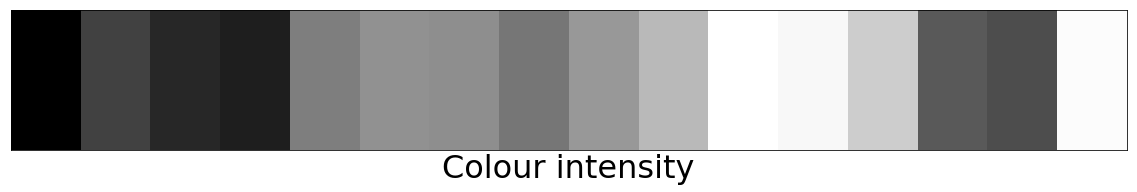

In [9]:
fig2 = plt.figure(figsize=(20,4))
ax2 = fig2.add_subplot(1, 1, 1)

ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_xlabel('Colour intensity', fontsize = '32')
im = ax2.imshow([intensity], interpolation = 'none', cmap = 'gray', aspect='2')
plt.show()

#fig2.savefig('intensity.png', dpi=100)

This second colorbar does not look ‘right’ any more. The intensity values go up and down seemingly randomly.
Let's look at the values to confirm it.

In [10]:
print (intensity)

[  0.  54.  32.  25. 102. 118. 115.  96. 123. 150. 207. 201. 166.  73.
  63. 204.]


An much better way to QC the intensity values was recently suggested to me by Evan Bianco of Agile Geoscience: with his code, below, we can display the colorbar with an overlay plot of the intensity. 
Notice that Evan converted the data into a 2D matrix so it can be passed to imshow as it is. 

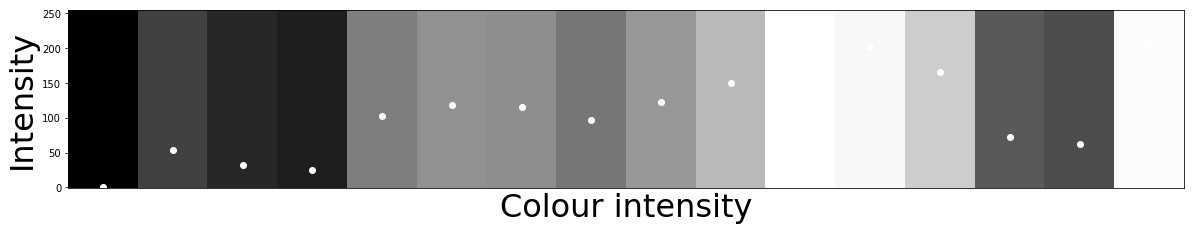

In [11]:
int_mtx = np.transpose(np.repeat(np.expand_dims(intensity,1),255,axis=1)) 
fig2a = plt.figure(figsize=(20,4))
ax2a = fig2a.add_subplot(1, 1, 1)

ax2a.set_xticks([])

ax2a.plot(intensity, 'wo', lw = 20)
ax2a.imshow(int_mtx, interpolation = 'none', cmap = 'gray', aspect='0.01')
ax2a.invert_yaxis()

ax2a.set_xlabel('Colour intensity', fontsize = '32')
ax2a.set_ylabel('Intensity', fontsize = '32')

plt.show()

In [12]:
sorted_intensity = np.sort(intensity)

# check the values
print (sorted_intensity)

[  0.  25.  32.  54.  63.  73.  96. 102. 115. 118. 123. 150. 166. 201.
 204. 207.]


Now we create the colorbar of sorted intensity using grayscale colormap. 

You can uncomment the last line to save the figure as a PNG image file.

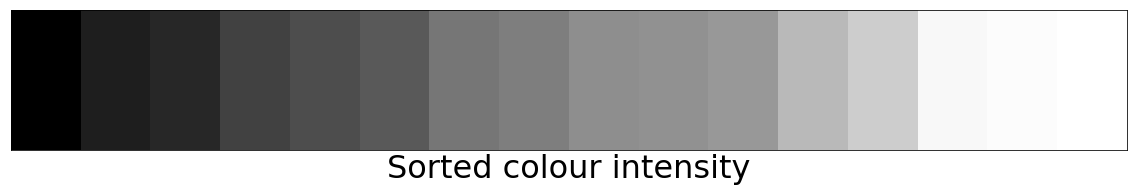

In [13]:
fig3 = plt.figure(figsize=(20, 4))
ax3 = fig3.add_subplot(1, 1, 1)

ax3.set_xticks([])
ax3.set_yticks([])

ax3.set_xlabel('Sorted colour intensity', fontsize = '32')
im = ax3.imshow([sorted_intensity], interpolation = 'none', cmap = 'gray', aspect='2')
plt.show()

#fig3.savefig('sorted_intensity.png', dpi=100)

That looks better. The last three elements on the right look quite similar, but we will try to explain that a bit further down.

Now we want to look at the full color version of the intensity-sorted colormap. This requires again a sorting operation, but this time we want to sort simultaneously RGB values and intensity using the latter, which takes more effort.

First, we use the zip function to join together data and intesity (as a list of tuples) which we can then sort.

In [14]:
colors = zip(data, intensity)  

# check the result
print (colors)

With the next block of code we sort the tuples in the list above by intensity (last element of tuple).

As I anticipated, we do it in a different way from how we sorted intensity alone, by using the function sorted(). This function accepts a key parameter to specify a function to be called on the element of the tuple we want to sort by. In this case the function called is an anonymous function (one which you do not have to define with 'def'). 
Lambda is the Python keyword used to generate anonymous functions.
x[-1] is the element in the tuple we want to sort by (the last one).

In [15]:
sorted_colors = sorted(colors, key=lambda x: x[-1]) 

# make sure it worked
print (sorted_colors)

[(0, 0.0), (3, 25.0), (2, 32.0), (1, 54.0), (14, 63.0), (13, 73.0), (7, 96.0), (4, 102.0), (6, 115.0), (5, 118.0), (8, 123.0), (9, 150.0), (12, 166.0), (11, 201.0), (15, 204.0), (10, 207.0)]


Next we get the sorted data from the sorted list of tuples, and we store it in a new list using a synthax called 
list comprehension. 
With the command below we are saying: "for each tuple x in the list sorted_colours, write to a new list called sorted_data the first element (remember again that Python starts indexing elements at 0, not 1 like Matlab).

List comprehension is a more compact syntax than an explicit for loop, where we'd iterate through the existing list, and it is by many the recommended syntax for creating lists from other lists.

Good article on list comprehension: http://carlgroner.me/Python/2011/11/09/An-Introduction-to-List-Comprehensions-in-Python.html

In [16]:
sorted_data = [x[0] for x in sorted_colors] 

# check the result
print (sorted_data)

[0, 3, 2, 1, 14, 13, 7, 4, 6, 5, 8, 9, 12, 11, 15, 10]


At this point we can create the colorbar of sorted colours using sorted_data and the original spectral colormap.

You can uncomment the last line to save the figure as a PNG image file.

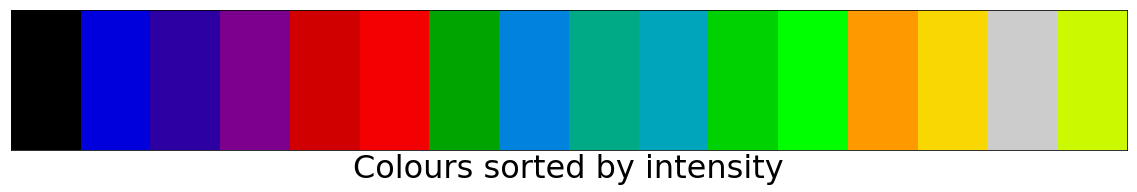

In [17]:
fig4 = plt.figure(figsize=(20, 4))
ax4 = fig4.add_subplot(1, 1, 1)

ax4.set_xticks([])
ax4.set_yticks([])

ax4.set_xlabel('Colours sorted by intensity', fontsize = '32')
im = ax4.imshow([sorted_data], interpolation = 'none', cmap = 'nipy_spectral', aspect = '2')
plt.show()

#fig4.savefig('sorted_colours.png', dpi=100)

And that does not look right at all.
I think we have managed to demonstrate that spectral is not a good palette in the sense that it does not have a monotonic and increasing intensity profile, and if it did, it would look quite unpleasant, and confusing, so we are back at square one.

As an aside, if you happened to have deficient color vision (more commonly referred to as color blindness), then even the original spectral colorbar would have looked ugly and confusing (e.g. Light and Bartlein 2004). 

With the next block of code I will import and display an image. It is fig1 as it would be seen by a person with deuteranopia, the most common form of color vision deficiency. The simulation of deuteranope vision were done in ImageJ with the Dichromacy plugin:


http://www.mecourse.com/landinig/software/dichromacy/dichromacy.html

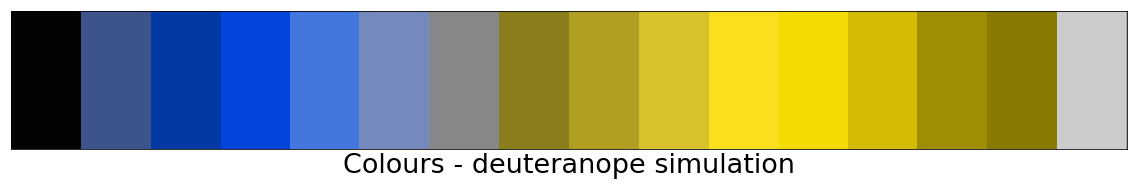

In [18]:
from PIL import Image

global ext
ext = ".png"

imageFile = "data/Spectral_16-colours_Deuteranope.png"
im = Image.open(imageFile)

fig1a = plt.figure(figsize=(20,4))
ax1a = fig1a.add_subplot(1, 1, 1)

ax1a.set_xticks([])
ax1a.set_yticks([])

ax1a.set_xlabel('Colours - deuteranope simulation',  fontsize = '27')
im1a = ax1a.imshow(im, interpolation = 'none')
plt.show()

#fig1a.savefig('colours - deuteranope.png', dpi=100)


If I were to look at this colorbar for the first time, knowing nothing about what we've discussed about so far, I'd guess that there's a high, the yellow, and then on either side we go to a low, an absolute low on the left, the black, and a relative low on the rigth, a medium gray. Confusing, and incorrect.

But there's an additional reason why this palette is bad and should be avoided. It has to do with variation in the rate of change in the intensity values.

The next couple of blocks of code generate a plot where each of the sorted colors is plotted as a 1-sample gray line, at a position on a scale 0-255 (a typical length for colormaps) corresponding to its intensity, and with a gray value also corresponding to its intensity. Bear with me, it will be all clear at the end.

First we create a 256 x 1 array of zeros. Then at the samples positions corresponding to the values of sorted intensity, we replace the zero with the intensity value itself.

In [19]:
euclidean_intensity = (np.ones(256)*255) 

euclidean_intensity[sorted_intensity.astype(int)] = [0,  25,  32,  54,  63,  73,  96, 102, 115, 118, 123, 150, 166,                                        
       201, 204, 207]

You can uncomment the command below if you want to look at the resulting 1x256 array.

In [20]:
#print euclidean_intensity

The next block of code generates the plot.

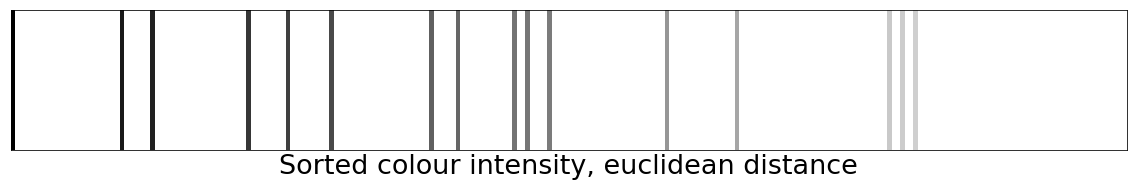

In [21]:
fig5 = plt.figure(figsize=(20,4))
ax5 = fig5.add_subplot(1, 1, 1)

ax5.set_xticks([])
ax5.set_yticks([])

ax5.set_xlabel('Sorted colour intensity, euclidean distance',  fontsize = '27')
im = ax5.imshow([euclidean_intensity], interpolation = 'none', cmap = 'gray',aspect = '32')
plt.show()

# fig5.savefig('sorted_intensity_0-255.png', dpi=100)

What is this plot telling us? It is telling us that even if the colors in fig4 are sorted by intensity, they are not equally spaced on a 0-255 scale. Towards the right end we see a cluster of three, these are the ones in fig3 I mentioned earlier which looked all fairly similar in intensity, and indeed we see that their values are 201, 204, and 207).  There are other clusters, but they are less noticeable for two reasons: first they are not as tight, and second the just noticeable difference increases towards darker intensities (for reference on the just noticeable difference see http://en.wikipedia.org/wiki/Just-noticeable_difference). 

The implication of this is that if we were to take the 16 colors in fig4 (assuming we did not find the sequence of hue ugly) and interpolate in RGB space to get a colormap of 256, we'd create several segments between each pair of consecutive colours with wildly varying intensity gradients, which could erroneously be interpreted as different gradients in the data.

As I wote in the paper, this is not just about making pretty (or ugly) maps. There can be significant and quantifiable impact from the misuse of colormaps. Medical practitioners recognized long ago that color visualization is not trivial and that in particular rainbow-like colormaps should be avoided. For example, Borkin et al. (2011) argued that using rainbow in artery visualization has a negative impact on task performance, and may cause more heart disease misdiagnoses.

On the geophysical side, Welland et al. (2006) argued that what is linear in HSL colour space is not linear in psychological colour space and demonstrated that remapping of the standard red-white-blue palette to a more psychological space allows discerning of subtle anomalies in the data that are not captured using the standard palette. Froner et al. (2013) showed in a carefully controlled experiment that the area of a shallow marine sand body mapped by hand on a time slice colored using a spectrum was 235% larger than the area resulting from mapping the sand on the same time slice colored with grayscale.

A footnote: as a test I converted fig1 and fig4 to grayscale. I was expecting for fig1 to look like fig2 and for fig 4 to look like fig 3.
Instead, they did not (I used ImageJ). I verified from other sources that the Matlab formula I used for intensity (I = 0.2989R + 0.5870G + 0.1140B) is correct, but then I discovered it is not unique. Instead, there are several formulas, each used by different photo editing software and printing device, and I am using just one of them:
http://www.tannerhelland.com/3643/grayscale-image-algorithm-vb6/

### Perceptual testing of colormaps

The perceptual test I introduce next to assess colormaps is not a new idea. I used it for the first time in 'How to assess a colourmap', an essay in the book '52 things you should know about geophysics', edited by Matt Hall and Evan Bianco and published by Agile Libre. http://www.amazon.com/Things-Should-Know-About-Geophysics/dp/0987959409

After introducing the concept in the essay I shared the Matlab code to replicate the test on the 1st post (http://wp.me/p1IlJY-8q) of my blog series 'The rainbow is dead... long live the rainbow'. Matlab code is open, but Matlab is not free so this Python Notebook is an opportunity to make the test more accessible and reproducible (and I hope to a larger audience as well).

Here's what we are going to do in this section: we will build a pyramid model and then plot two versions of it: one colored using the spectral colormap, the other with a rainbow-like colormap with linear lightness profile. Since the pyramid is a model, a perfect polyhedron with a smooth surface, there should be no visible artifacts. In other words, the colours should vary continuously and smoothy with the surface. We will easily recognize that this is not the case when we use the spectral colormap (in fact this is seldom the case with rainbow-like colormaps). We will also easily see that the pyramid colored with linear lightness palette has no artifacts. Thus the pyramid is a good way to spot them. 

Together with the pyramid we will also create a plot of the colormap's ligthness as a line in x-y space. The plot will have ligthness as the y coordinate and pyramid elevation as the x coordinate, and the line will change color with elevation in the same way in which the pyramid does. This way we will be able to link the pyramid and the ligthness and better understand what parts of the colormap create the artifacts and why.

#### Step 1 - importing MyCarta's perceptual Linear-L rainbow palette and converting it into a custom, 256-sample Matplotlib colormap

The LinerL palette is a slight modification of a palette introduced in Kindlmann et al. (2002). I described the adjustments I made in the 5th post (http://wp.me/p1IlJY-Du) of of my blog series 'The rainbow is dead... long live the rainbow'.

This block of code reads in Red, Green, and Blue triplets from a tab-delimited text file. RGB values in the file are in the range 0-1.

In [22]:
linl = np.loadtxt('data/Linear_L_0-1.txt') 

Let's check the imported values by looking at the first 10 RGB triplets. The notation [:9] is aain an instance of slicing.

In [23]:
print (linl[0:9])

[[0.0143 0.0143 0.0143]
 [0.0404 0.0125 0.0325]
 [0.0516 0.0154 0.0443]
 [0.0616 0.0184 0.053 ]
 [0.0699 0.0215 0.0615]
 [0.0814 0.0229 0.0687]
 [0.0857 0.0273 0.0763]
 [0.0928 0.0305 0.0805]
 [0.1008 0.033  0.0846]]


In [24]:
# setting up color arrays
r1 = linl[:, 0] # value of Red for the nth sample
g1 = linl[:, 1] # value of Green for the nth sample
b1 = linl[:, 2] # value of Blue for the nth sample

r2 = r1 # value of Red at the nth sample
r0 = np.linspace(0, 1, len(r1)) # position of the nth Red sample within the range 0 to 1

g2 = g1 # value of Green at the nth sample
g0 = np.linspace(0, 1, len(g1)) # position of the nth Green sample within the range 0 to 1

b2 = b1 # value of Blue at the nth sample
b0 = np.linspace(0, 1, len(b1)) # position of the nth Blue sample within the range 0 to 1

# creating lists
R = zip(r0, r1, r2)
G = zip(g0, g1, g2)
B = zip(b0, b1, b2)

# creating list of above lists and transposing
RGB = zip(R, G, B)
rgb = zip(*RGB)
#print (rgb)

# creating dictionary
k=['red', 'green', 'blue'] # makes list of keys
linearl=dict(zip(k,rgb)) # makes a dictionary from list of keys and list of values

The next block of code makes the custom Matplotlib color palette from the dictionary we just created, then uses the same 8x8 checker-board pattern from the Perception experiment section to test the result.

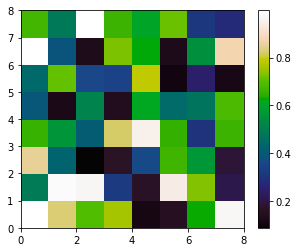

In [25]:
my_l = clr.LinearSegmentedColormap('my_colormap', linearl)

plt.figure(figsize=(5,4)) 
plt.pcolor(rndm, cmap=my_l)
plt.colorbar()
plt.show()

#### Step 2 - importing the elevation data for the Great Pyramid of Gyza

In this section we will import the elevation data for the Great Pyramid of Giza using the original model dimensions of 755x755x482 feet. These are the dimensions as they would have been in the planners' drafts (prior to erosion). Notice that I use imperial measurements as they are round values, which made programming a bit easier.
If you are curious about how I created the data I shared my Matlab code at the end of the 1st post (http://wp.me/p1IlJY-8q) of the 'Rainbow is dead...' blog series.

For this tutorial I simply exported the x, y, and z Matlab matrices separately in ASCII files after stacking each one into a single vertical array. This is done in Matlab with the notation: a = m (:);   

where a is one of the output x, y, or z arrays and m is the corresponding input matrix.

This first block of code below loads the data from the 3 ASCII files. Each file contains a 1D array with 232324 elements (482 x 482).

In [26]:
x0 = np.loadtxt('data/GIZA_X.txt')
y0 = np.loadtxt('data/GIZA_Y.txt')
z0 = np.loadtxt('data/GIZA_Z.txt')

This second block of code reshapes the 1D arrays to 482 x 482 2D arrays.

In [27]:
x=np.reshape(x0,(482,482))
y=np.reshape(y0,(482,482))
z=np.reshape(z0,(482,482))

#### Step 3 - plot pyramid using Linear-L and spectral palettes

First we plot the Pyramid surface using the LinearL colormap and we add a color bar.
You can uncomment the last line to save this as an image.

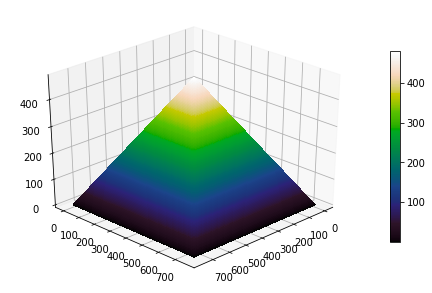

In [28]:
from mpl_toolkits.mplot3d import Axes3D

fig6 = plt.figure(figsize=(8,5))

ax6 = fig6.add_subplot(1, 1, 1, projection='3d')
p6 = ax6.plot_surface(x, y, z, rstride=1, cstride=1, cmap=my_l, linewidth=0, antialiased=False, 
                    shade=True)
cb = fig6.colorbar(p6, shrink=0.7)
ax6.view_init(30,45)
plt.show()

#fig6.savefig('pyramid_LinearL.png', dpi=200)

Now we do the same with the spectral colormap.

In [ ]:
fig7 = plt.figure(figsize=(8,5))

ax7 = fig7.add_subplot(1, 1, 1, projection='3d')

p7 = ax7.plot_surface(x, y, z, rstride=1, cstride=1, cmap='nipy_spectral', linewidth=0, antialiased=False, 
                    shade=True)
cb = fig7.colorbar(p7, shrink=0.7)
ax7.view_init(30,45)
plt.show()

#fig7.savefig('pyramid_spectral.png', dpi=200)

First impression: whith the LinearL colormap the 1st pyramid surface is smoothly colored, without any perceptual artifact - good! This is not the case with the spectral colormap: the 2nd pyramid surface appears broken into several bands of virtually constant colours and varying widths - not so good.

#### Step 4 - plotting the lightness profile for the two palettes using the colorline function 

##### 4a - copying the colorline function

To make the ligthness plots published in Figure 2b and Figure 3b in the paper I used the colorline function by David Sanders (dpsanders on GitHub), which you can find in this notebook:

http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb

In [ ]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm


# Data manipulation:

def make_segments(x, y):
    '''
    Create list of line segments from x and y coordinates, in the correct format for LineCollection:
    an array of the form   numlines x (points per line) x 2 (x and y) array
    '''

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    return segments


# Interface to LineCollection:

def colorline(x, y, z=None, cmap=plt.get_cmap('copper'), norm=plt.Normalize(0.0, 1.0), linewidth=3, alpha=1.0):
    '''
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    '''
    
    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))
           
    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])
        
    z = np.asarray(z)
    
    segments = make_segments(x, y)
    lc = LineCollection(segments, array=z, cmap=cmap, norm=norm, linewidth=linewidth, alpha=alpha)
    
    ax = plt.gca()
    ax.add_collection(lc)
    
    return lc
        
    
def clear_frame(ax=None): 
    # Taken from a post by Tony S Yu
    if ax is None: 
        ax = plt.gca() 
    ax.xaxis.set_visible(False) 
    ax.yaxis.set_visible(False) 
    for spine in ax.spines.itervalues(): 
        spine.set_visible(False) 

##### 4b creating the lightness profile for the spectral colormap

To get lightness we need to convert the colormaps from RGB values to CIE Lab values. The function rgb2lab from the Scipy image processing toolbox (scikit-image, or skimage) does just that. However, before we can utilize the function we'll need to convert each 256 x 3 RGB array into a 256 x 256 x 3 array because the library was written for RGB images (sometimes called truecolor images; you can think of these as images of M x N size with each of the three RGB channels stored in a separate element of the 3rd dimension of the array). 

In practice nstead of working with 256 RGB colours we will work in this case with only 120 RGB colurs (hence a 120 x 120 x 3 image) due to graphical constraint imposed by the colorline function, which I will explain further below.

First, we get the 120 RGB values. You can check them by uncommenting the last line of code in the block below.

In [ ]:
sp=np.arange(120)
my_spectral = cm.get_cmap('nipy_spectral') 
normsp = clr.Normalize(0, 120) 
colsp = my_spectral(normsp(sp))

#print (colsp)

Next we use the tile Numpy function to replicate 120 times the 1 x 120 red, green, and blue arrays.

In [ ]:
rsp = np.tile(colsp[:,0], (120,1))
gsp = np.tile(colsp[:,1], (120,1))
bsp = np.tile(colsp[:,2], (120,1))

rsp.shape # check the shape of the output array

Next we zip the three arrays above together

In [ ]:
rgb_sp=np.array(list(zip(rsp, gsp ,bsp)))

rgb_sp.shape # check the shape of the output array

Oops! The result seems correct but the last two dimensions are in the wrong order. The Numpy swapaxes function will fix that.

In [ ]:
rgb_spectral=np.swapaxes(rgb_sp,1,2)

rgb_spectral.shape # check the shape of the array again

Done! But to be 100% sure let's plot the image with the next block of code.

In [ ]:
fig8 = plt.figure(figsize=(5,5))
ax8 = fig8.add_subplot(1, 1, 1)

ax8.set_xticks([])
ax8.set_yticks([])

plt.imshow(rgb_spectral);

Perfect. This is a 120 rows by 120 columns image in which each row is a 120-sample spectral palette. Now we are ready to convert it to CIE Lab.

In [ ]:
import skimage.color as skl
lab_sp = skl.rgb2lab(rgb_spectral)

And finally we extract the lightness 1 x 256 array (1st row, all columns, 1st channel - remember again that Python starts indexing at 0).

In [ ]:
l_sp = lab_sp[0,:,0]

l_sp.shape # check the shape

We can also plot it to make sure it makes sense.

In [ ]:
plt.plot(l_sp);

It does in that the values of lightness are within the 0-100 range, as they should be, but it certainly looks very erratic.

##### 4c plotting the lightness profile for the spectral colormap

The next block of code is the one that makes the fancier lightness plot. We just got lightness as the y coordinates for the line, but we need to define the x coordinate, which we want to represent pyramid elevation as anicipated. The pyramid is 482 feet high so my first attempt was to just use the values in the range 0-482. However, 482 samples are too many for the colorline function because it colors the line by creating individual segments between each pair of x values and 482 segments would be too short and give the line a choppy look. So I decided to decimate the elevation by 4 and round down to 120 (1st line of code below). 

As a result of this decimation, to match the pyramid's tick marks and labels, which are spaced every every 50 feet I also decimated 50 by 4 hence labels are positioned every 12.5 x samples in the range 1-120, e.g. [0.0, 12.5, 25.0, 37.5, 50.0, 62.5, 75.0, 87.5, 100.0, 112.5], corresponding to every 50 m in the range 0-480, e.g. the desired [0, 50, 100, 150, 200, 250, 300, 350, 400, 450].


In [ ]:
xsp = np.arange(120)
fig9= plt.figure(figsize=(8,4))

ax9 = fig9.add_subplot(1, 1, 1)
colorline(xsp,l_sp,linewidth=2,cmap="nipy_spectral")
ax9.set_ylabel('Ligthness  L*', fontsize = '12' )
ax9.set_xlabel('Pyramid elevation', fontsize = '12')
plt.xlim(xsp.min(), xsp.max())
plt.ylim(0, 100)
plt.xticks(np.arange(0,120,12.5),['0', '50', '100', '150', '200', '250', '300', '350', '400', '450'])

plt.show()
#fig9.savefig('L_profile_spectral.png', dpi=200)

The erratic lightness profile in fig9 highlights the many issues with spectral. The curve gradient changes several times, indicating a nonuniform perceptual distance between samples. Worse, inversions occur in the gradient (one example is at the arrow). If this palette is used to map elevation, it  will interfere with the correct perception of relief, particularly if shading is added, and it will hinder our interpretation when we do not have a priori knowledge of the structures in the data. 

##### 4d creating the lightness profile for the LinearL colormap

We repeat all of sections 2b and 2c to make the same lightness plot for the LinearL palette.

In [ ]:
sll=np.arange(120)
my_linearl = cm.get_cmap(my_l) 
normll = clr.Normalize(0, 120) 
colll = my_l(normll(sll))

#print (colll)

In [ ]:
rll=np.tile(colll[:,0],(120,1))
gll=np.tile(colll[:,1],(120,1))
bll=np.tile(colll[:,2],(120,1))
rll.shape

In [ ]:
rgb_ll=np.array(list(zip(rll, gll ,bll)))

rgb_ll.shape

In [ ]:
rgb_linearl=np.swapaxes(rgb_ll,1,2)

rgb_linearl.shape

In [ ]:
fig10 = plt.figure(figsize=(5,5))
ax10 = fig10.add_subplot(1, 1, 1)

ax10.set_xticks([])
ax10.set_yticks([])

plt.imshow(rgb_linearl);

In [ ]:
lab_ll = skl.rgb2lab(rgb_linearl)

In [ ]:
l_ll = lab_ll[0,:,0]

l_ll.shape

In [ ]:
plt.plot(l_ll);

##### 4d plotting the lightness profile for the LinearL colormap

In [ ]:
xll = np.arange(120)
fig11 = plt.figure(figsize=(8,4))

ax11 = fig11.add_subplot(1, 1, 1)
colorline(xll,l_ll,linewidth=2,cmap=my_l)
ax11.set_ylabel('Ligthness  L*', fontsize = '12' )
ax11.set_xlabel('Pyramid elevation', fontsize = '12')
plt.xlim(xll.min(), xll.max())
plt.ylim(0, 100)
plt.xticks(np.arange(0,120,12.5),['0', '50', '100', '150', '200', '250', '300', '350', '400', '450'])

plt.show()
#fig11.savefig('L_profile_spectral.png', dpi=200)

This is much better than the lightness prifile in fig9, and explains why, when using the LinearL palette, the pyramid surface is smoothly colored without perceptual artifacts.

### Comparison of palettes with real data - Penobscot 3D horizon

This is the final section of this part 1 of the tutorial. After testing the two palettes, I wanted to compare them using real geophyisical data. The Penobscot 3D horizon used by Matt Hall in the first tutorial of this series (Hall, 2014), and just copied Matt's code to import the horizon from the data directory. Please refer to his tutorial for an in-depth explanation of the code. 

In [ ]:
data = np.loadtxt('data/Penobscot_HorB.txt')
print (data[:10])

In [ ]:
inlines = 1597 - 1003 + 1
xlines = 1471 - 1009 + 1

data[:,0] = inlines - (data[:,0] - 1002) 
data[:,1] -= 1008 # same as data[:,1] = data[:,1] - 1008
data[:5]


In [ ]:
horizon = np.empty((inlines, xlines))

for sample in data:
    inline = sample[0]
    xline = sample[1]
    z_value = sample[2]
    
    # We have to subtract 1 to allow for 0-based indexing
    horizon[(inline - 1).astype(int), (xline - 1).astype(int)] = z_value

With the next two blocks of code I display the horizon with the spectral and LinearL palettes.

In [ ]:
fig12 = plt.figure(figsize=(18,9))
plt.imshow(horizon, aspect=0.5, vmin=888, vmax=1064, cmap='nipy_spectral')
plt.colorbar()
plt.show()

#fig12.savefig('horizon_spectral', dpi=300)

In [ ]:
fig13 = plt.figure(figsize=(18,9))
plt.imshow(horizon, aspect=0.5, vmin=888, vmax=1064, cmap=my_l) # using LinearL, as defined
                                                                # in Step 1 of the section Perceptual
                                                                # testing of colormaps
plt.colorbar()
plt.show()

#fig13.savefig('horizon_LinearL', dpi=300)

Perhaps from a casual look, the map in fig10 might seem better because of the apparent higher contrast (higher magnitude gradients), but at what cost? With insight from the perceptual tests, we  can now say the cost is that of introducing artificial structures not present in the data combined with the obfuscation of subtle structures that are present conversely in the data (one example is shown in the paper, marked by a black arrow). So are we interpreting the color maps or the data or both?

### More perceptual palettes

Next time, I will show readers how to make perceptual palettes from scratch. In the meantime, I can recommend using any of the three perceptual rainbows downloadable from my blog at wp.me/P1IlJY-Z6 or using cubehelix (Green, 2011), which is available by default in matplotlib and was used in the first tutorial for the Penobscot horizon.

### References

Borkin, M et al. (2011). Evaluation of artery visualizations for heart disease diagnosis. IEEE Transactions on Visualization and Computer Graphics 17, no. 12, 2479–2488, http://dx.doi.org/10.1109/TVCG.2011.192.

Borland, D., and M. R. Taylor II (2007). Rainbow color map (still) considered harmful: IEEE Computer Graphics and Applications,  27, no. 2, 14–17, http://dx.doi.org/10.1109/MCG.2007.323435.

Froner, B et al. (2013). Perception of visual information: the role of color in seismic interpretation. First Break 31 no. 4, 29–34, http://dx.doi.org/10.3997/1365-2397.2013010.

Green, D. A. (2011). A colour scheme for the display of astronomical intensity images, Bulletin of the Astromical Society of India, 39, 289-295.
http://adsabs.harvard.edu/abs/2011BASI...39..289G

Hall, M. (2014). Smoothing surfaces and attributes. The Leading Edge 33, no. 2, 128–129, http://dx.doi.org/10.1190/tle33020128.1.

Kindlmann, E et al. (2002). Face-based Luminance Matching for Perceptual Colour map Generation - Proceedings of Proceedings of the IEEE conference on Visualization, 299-306.

Light, A and P Bartlein (2004). The end of the rainbow?  Color schemes for improved data graphics. EOS Transactions of the American Geophysical Union 85, no. 40, 385–391, http://dx.doi.org/10.1029/2004EO400002.

Montag, E (1999). The use of color in multidimensional graphical information display. IS&T Seventh Color Imaging Conference: Color Science, Systems, and Applications.

Niccoli, M (2012). How to assess a colourmap. In: Hall & Bianco, eds, 52 Things You Should Know About Geophysics, Agile Libre, 36–37.

Niccoli, M and S Lynch (2012). A more perceptual colour palette for structure maps. Canada GeoConvention abstract, Calgary 2012.

Niccoli, M (2013). Several articles on the My Carta blog, mycarta.wordpress.com. See wp.me/p1IlJY-js.

Rogowitz, B and  A Kalvin (2001). The "Which Blair project": a quick visual method for evaluating perceptual color maps. IEEE Proceedings, Visualization 2001.

Rogowitz, B et al. (1999). Which trajectories through which perceptually uniform color spaces produce appropriate color scales for interval data? IS&T Seventh Color Imaging Conference: Color Science, Systems, and Applications.

Welland, M et al. (2006). Are we properly using our brains in seismic interpretation? - The Leading Edge 25 (2), 142-144.
